## Import Libraries

In [1]:
# import necessary libraties
import cv2
import numpy as np
from glob import glob
import random
import ipyplot
from matplotlib import pyplot as plt

## Data & Feature Extraction Methods Exploration

(-0.5, 1907.5, 4031.5, -0.5)

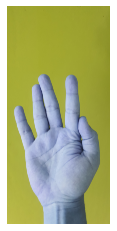

In [2]:
# read image
img = cv2.imread("Images/0/3.jpg")
plt.imshow(img); plt.axis("off")

(-0.5, 1907.5, 4031.5, -0.5)

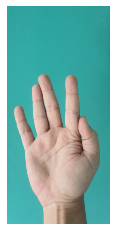

In [3]:
# convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis("off")

In [4]:
# check image size
print(f"The size of the image is: {img_rgb.shape}")

The size of the image is: (4032, 1908, 3)


In [5]:
# resize image 
img_resized = cv2.resize(img_rgb, (int(img_rgb.shape[1] * 0.2), int(img_rgb.shape[0] * 0.2)))
print(f"The size of the resized image is: {img_resized.shape}")

The size of the resized image is: (806, 381, 3)


(-0.5, 380.5, 805.5, -0.5)

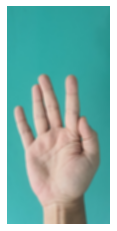

In [6]:
# apply blur filter to image
img_blurred = cv2.blur(img_resized, ksize=(11,11))
plt.imshow(img_blurred); plt.axis("off")

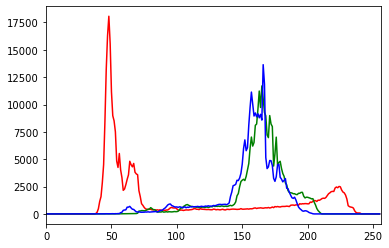

In [7]:
# check color channels to see if we can segment by channels
# => we can keep only the red channel and create a mask
colors = ["r", "g", "b"]
for ind, color in enumerate(colors):
    hist = cv2.calcHist(images=[img_blurred], channels=[ind], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])
plt.show()

Text(0.5, 1.0, 'Red Channel Mask')

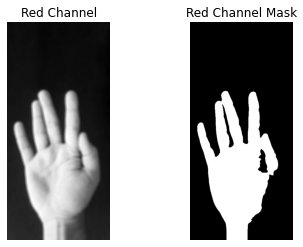

In [8]:
# create mask
mask_red = img_blurred[...,0]>150

plt.subplot(1, 2, 1); plt.imshow(img_blurred[...,0], cmap="gray"); plt.axis("off"); plt.title("Red Channel")
plt.subplot(1, 2, 2); plt.imshow(mask_red, cmap="gray"); plt.axis("off"); plt.title("Red Channel Mask")

In [9]:
# function that creates a mask according to the background
# background color in RGB: (46, 163, 157)
def sim_col(v):
    if abs(v[0] - 46) < 70 and abs(v[1] - 163) < 70 and abs(v[2] - 157) < 70:
        return (0,0,0)
    return (255,255,255)

(-0.5, 380.5, 805.5, -0.5)

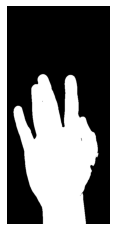

In [10]:
# apply sim_color function to create mask
mask_bg = img_blurred.copy()
for i in range(img_blurred.shape[1]):
    for j in range(img_blurred.shape[0]):
        mask_bg[j,i] = sim_col(img_blurred[j,i])
plt.imshow(mask_bg); plt.axis("off")

In [11]:
# cv2.Sobel parameters
# src - input image.
# dst - output image of the same size and the same number of channels as src .
# ddepth - output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives.
# dx - order of the derivative x.
# dy - order of the derivative y.
# ksize - size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
# scale - optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).
# delta - optional delta value that is added to the results prior to storing them in dst.
# borderType - pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

(-0.5, 380.5, 805.5, -0.5)

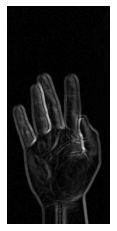

In [12]:
# apply Sobel filter
scale = 1
delta = 0
ddepth = cv2.CV_16S

gray = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2GRAY)
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.imshow(grad, cmap="gray"); plt.axis("off")

## Load and Shuffle Dataset

In [13]:
# define database path
base_path = "Images/"

# define empty list to store image paths
file_list = []

# loop though each of the 4 classes folder and add the paths to file_list
for i in range(4):
    one_class_folder = glob(base_path+str(i)+"/*.jpg")
    file_list.append(one_class_folder)
    
# print found image paths
print(file_list) 

[['Images/0\\0.jpg', 'Images/0\\1.jpg', 'Images/0\\2.jpg', 'Images/0\\3.jpg', 'Images/0\\4.jpg', 'Images/0\\5.jpg', 'Images/0\\6.jpg', 'Images/0\\7.jpg', 'Images/0\\8.jpg', 'Images/0\\9.jpg'], ['Images/1\\0.jpg', 'Images/1\\1.jpg', 'Images/1\\2.jpg', 'Images/1\\3.jpg', 'Images/1\\4.jpg', 'Images/1\\5.jpg', 'Images/1\\6.jpg', 'Images/1\\7.jpg', 'Images/1\\8.jpg', 'Images/1\\9.jpg'], ['Images/2\\0.jpg', 'Images/2\\1.jpg', 'Images/2\\2.jpg', 'Images/2\\3.jpg', 'Images/2\\4.jpg', 'Images/2\\5.jpg', 'Images/2\\6.jpg', 'Images/2\\7.jpg', 'Images/2\\8.jpg', 'Images/2\\9.jpg'], ['Images/3\\0.jpg', 'Images/3\\1.jpg', 'Images/3\\2.jpg', 'Images/3\\3.jpg', 'Images/3\\4.jpg', 'Images/3\\5.jpg', 'Images/3\\6.jpg', 'Images/3\\7.jpg', 'Images/3\\8.jpg', 'Images/3\\9.jpg']]


In [14]:
# set random seed 
random.seed(42)

# get 7 random indexes in order to shuffle train set
train_indexes = random.sample(range(0, 9), 7)
print(f"Train indexes: {train_indexes}")

# use the other 3 remaining indexes for the test set
test_indexes = [test_index for test_index in range(0, 10) if test_index not in train_indexes]
print(f"Test indexes: {test_indexes}")

Train indexes: [1, 0, 5, 2, 8, 4, 7]
Test indexes: [3, 6, 9]


In [15]:
# define empty lists to store image paths corresponding to the train and test sets
train_files = []
test_files = []

# add files to train_files or tesy_files according to prev. defined indexes
for files in file_list:
    train_files.append([files[ind] for ind in train_indexes])
    test_files.append([files[ind] for ind in test_indexes])

# print shape of train_files and test_files to see they were created correctly
print(f"Shape of train_files: {np.shape(train_files)}")
print(f"Shape of test_files: {np.shape(test_files)}")

Shape of train_files: (4, 7)
Shape of test_files: (4, 3)


In [16]:
print(train_files)
print(test_files)

[['Images/0\\1.jpg', 'Images/0\\0.jpg', 'Images/0\\5.jpg', 'Images/0\\2.jpg', 'Images/0\\8.jpg', 'Images/0\\4.jpg', 'Images/0\\7.jpg'], ['Images/1\\1.jpg', 'Images/1\\0.jpg', 'Images/1\\5.jpg', 'Images/1\\2.jpg', 'Images/1\\8.jpg', 'Images/1\\4.jpg', 'Images/1\\7.jpg'], ['Images/2\\1.jpg', 'Images/2\\0.jpg', 'Images/2\\5.jpg', 'Images/2\\2.jpg', 'Images/2\\8.jpg', 'Images/2\\4.jpg', 'Images/2\\7.jpg'], ['Images/3\\1.jpg', 'Images/3\\0.jpg', 'Images/3\\5.jpg', 'Images/3\\2.jpg', 'Images/3\\8.jpg', 'Images/3\\4.jpg', 'Images/3\\7.jpg']]
[['Images/0\\3.jpg', 'Images/0\\6.jpg', 'Images/0\\9.jpg'], ['Images/1\\3.jpg', 'Images/1\\6.jpg', 'Images/1\\9.jpg'], ['Images/2\\3.jpg', 'Images/2\\6.jpg', 'Images/2\\9.jpg'], ['Images/3\\3.jpg', 'Images/3\\6.jpg', 'Images/3\\9.jpg']]


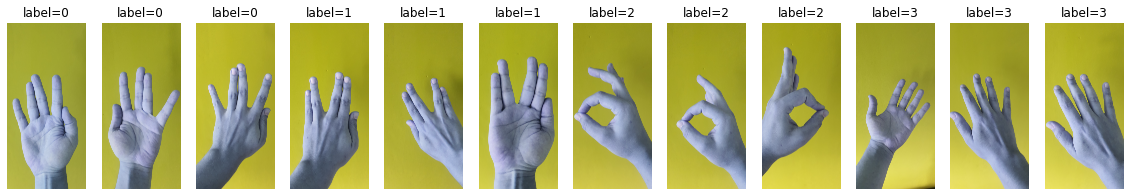

In [17]:
# create train images and test images lists
train_images = [cv2.imread(img) for folder in train_files for img in folder]
test_images = [cv2.imread(img) for folder in test_files for img in folder]

# create train labels and test labels lists
train_labels = [int(img.split("/")[-1][0]) for folder in train_files for img in folder]
test_labels = [int(img.split("/")[-1][0]) for folder in test_files for img in folder]

# show test images and their labels
fix, ax = plt.subplots(1, 12, figsize = (20, 6))
for i in range(12):
    ax[i].imshow(test_images[i], cmap = "gray");
    ax[i].axis("off")
    ax[i].set_title(f"label={test_labels[i]}")
plt.show()

## Preprocess Dataset

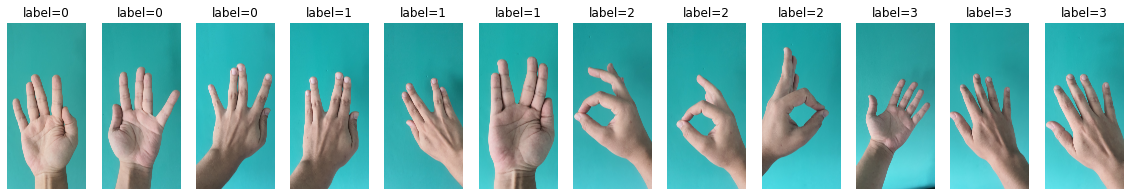

In [18]:
# define function that converts from BGR to RGB
def bgr_to_rgb(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

# use map to apply bgr_to_rgb function to train_images and test_images
train_images_rgb = list(map(bgr_to_rgb, train_images))
test_images_rgb = list(map(bgr_to_rgb, test_images))

# show rgb test images and their labels
fix, ax = plt.subplots(1, 12, figsize = (20, 6))
for i in range(12):
    ax[i].imshow(test_images_rgb[i], cmap = "gray");
    ax[i].axis("off")
    ax[i].set_title(f"label={test_labels[i]}")
plt.show()

In [19]:
# define function to resize image
def resize(img):
    img_resized = cv2.resize(img, (int(img.shape[1] * 0.2), int(img.shape[0] * 0.2)))
    return img_resized

# use map to apply resize function to train_images and test_images
train_images_resized = list(map(resize, train_images_rgb))
test_images_resized = list(map(resize, test_images_rgb))

# print initial image shape
print(f"Initial shape = {train_images_rgb[0].shape}")
# print resized image shape
print(f"Shape after resizing = {train_images_resized[0].shape}")

Initial shape = (4032, 1908, 3)
Shape after resizing = (806, 381, 3)


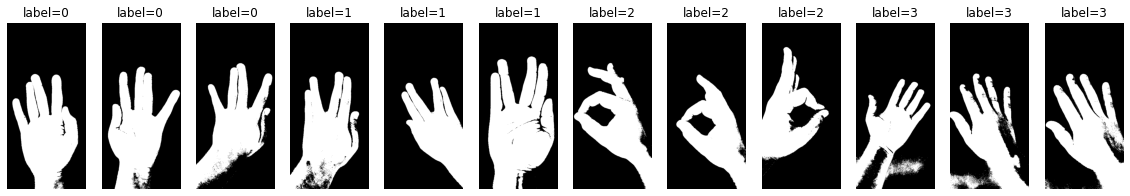

In [20]:
# define function to create hand mask
def hand_mask(img):
    mask = img[...,0] > 95
    mask[mask > 0] = 255
    return mask

# use map to apply hand_mask function to train_images and test_images
train_images_mask = list(map(hand_mask, train_images_resized))
test_images_mask = list(map(hand_mask, test_images_resized))

# show test images masks and their labels
fix, ax = plt.subplots(1, 12, figsize = (20, 6))
for i in range(12):
    ax[i].imshow(test_images_mask[i], cmap = "gray");
    ax[i].axis("off")
    ax[i].set_title(f"label={test_labels[i]}")
plt.show()

In [21]:
# define function to crop image
def crop_img(img, rect):
    return img[rect[1]:(rect[1] + rect[3]), rect[0]:(rect[0] + rect[2])]

# define function to extract hand contour
def hand_contour(img, img_orig):
    contours, _ = cv2.findContours(img.astype(np.uint8), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
    max_area = 0
    rect_max = np.array([0, 0, 0, 0])
    for contour in contours:
        # get bounding rectangle of found contour
        temp = cv2.boundingRect(contour)
        if temp[2] * temp[3] > max_area:
            max_area = temp[2] * temp[3]
            rect_max = temp
    return crop_img(img, rect_max), crop_img(img_orig, rect_max)

# use map to apply hand_contour function to train_images and test_images
train_images_packed = list(map(hand_contour, train_images_mask, train_images_resized))
train_contours_cropped = [x[0] for x in train_images_packed]
train_images_cropped = [x[1] for x in train_images_packed]

test_images_packed = list(map(hand_contour, test_images_mask, test_images_resized))
test_contours_cropped = [x[0] for x in test_images_packed]
test_images_cropped = [x[1] for x in test_images_packed]

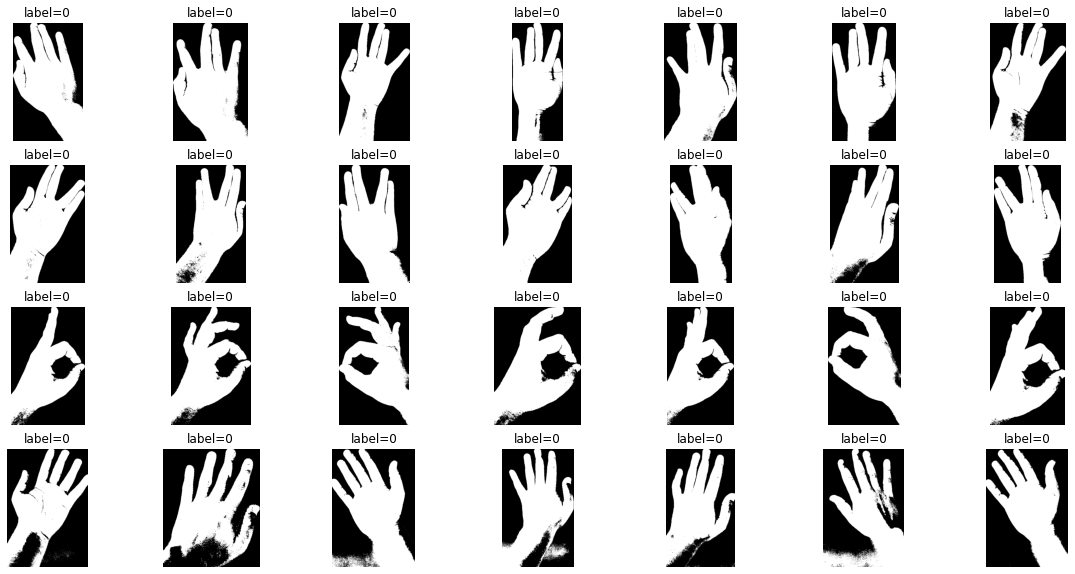

In [22]:
# plot cropped hand masks (training set)
fix, ax = plt.subplots(4, 7, figsize = (20, 10))
for i in range(4):
    for j in range(7):
        ax[i][j].imshow(train_contours_cropped[i * 7 + j], cmap = "gray")
        ax[i][j].axis("off")
        ax[i][j].set_title(f"label={train_labels[i]}")

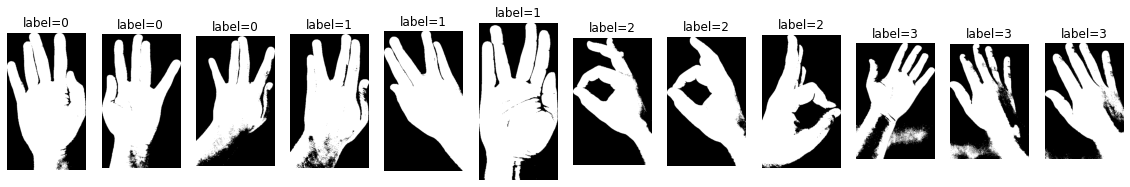

In [23]:
# plot cropped hand masks (test set)
fix, ax = plt.subplots(1, 12, figsize = (20, 6))
for i in range(12):
    ax[i].imshow(test_contours_cropped[i], cmap = "gray")
    ax[i].axis("off")
    ax[i].set_title(f"label={test_labels[i]}")

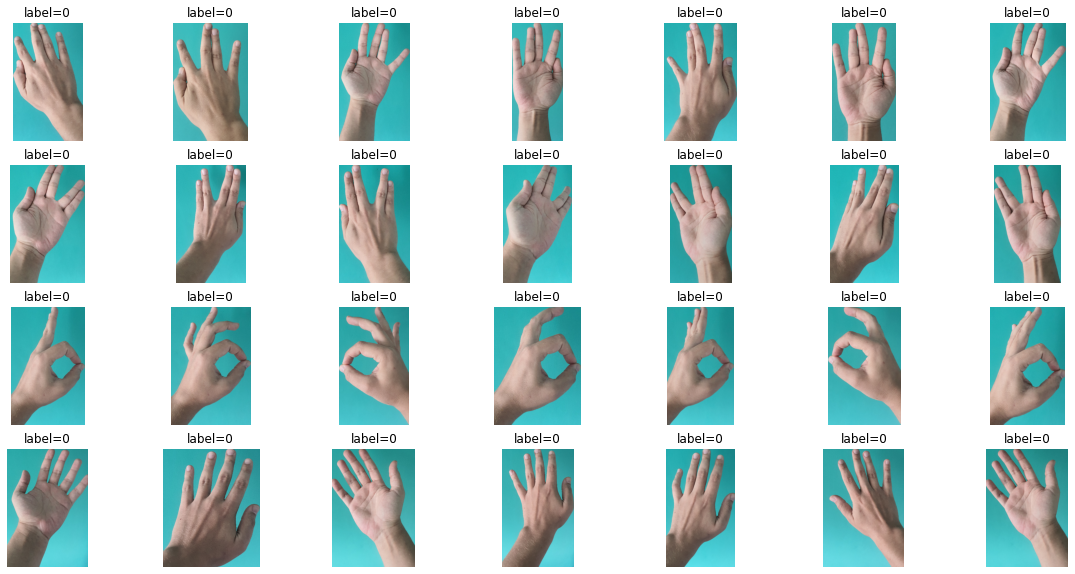

In [24]:
# plot cropped images (training set)
fix, ax = plt.subplots(4, 7, figsize = (20, 10))
for i in range(4):
    for j in range(7):
        ax[i][j].imshow(train_images_cropped[i * 7 + j])
        ax[i][j].axis("off")
        ax[i][j].set_title(f"label={train_labels[i]}")

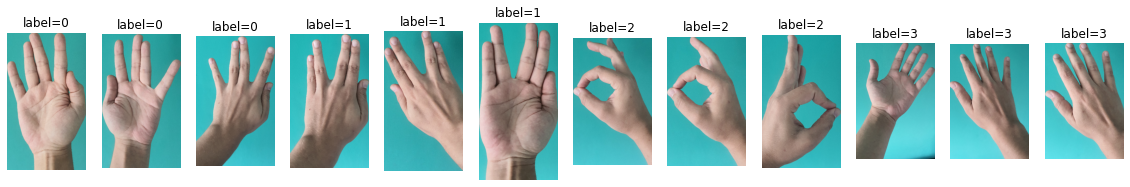

In [25]:
# plot cropped images (test set)
fix, ax = plt.subplots(1, 12, figsize = (20, 6))
for i in range(12):
    ax[i].imshow(test_images_cropped[i])
    ax[i].axis("off")
    ax[i].set_title(f"label={test_labels[i]}")

## Extract Features

In [26]:
# resize all the images to 68 x 128
def resize_img(img, width=68, height=128):
    return cv2.resize(img, (width, height))

print(f"Initial shape: {test_images_cropped[1].shape}")
train_images_cropped_resized = list(map(resize_img, train_images_cropped))
test_images_cropped_resized = list(map(resize_img, test_images_cropped))
print(f"Shaped after resizing: {test_images_cropped_resized[1].shape}")

Initial shape: (591, 347, 3)
Shaped after resizing: (128, 68, 3)


In [27]:
# initialize HOG descriptor
winSize = (64, 64)
blockSize = (16, 16)
blockStride = (16, 16)
cellSize = (8, 8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture,winSigma,
                        histogramNormType, L2HysThreshold, gammaCorrection, nlevels)

In [28]:
# define function to extract HOG features
def compute_hog(img, winStride=(8,8), padding=(8,8), locations=((10,20),)):
    return hog.compute(img, winStride=winStride, padding=padding, locations=locations)

# use map to apply compute_hog function to train_images and test_images
train_features = list(map(compute_hog, train_images_cropped_resized))
test_features = list(map(compute_hog, test_images_cropped_resized))

# print shapes of train_features and test_features
print(f"Shape of extracted features from train dataset: {np.shape(train_features)}")
print(f"Shape of extracted features from test dataset: {np.shape(test_features)}")

Shape of extracted features from train dataset: (28, 576)
Shape of extracted features from test dataset: (12, 576)


In [29]:
# convert train_features, test_features, train_labels and test_labels to numpy arrays of type float32
train_features = np.float32(train_features)
test_features = np.float32(test_features)
train_labels = np.float32(train_labels)
test_labels = np.float32(test_labels)

## Classify Images

### k-Nearest Neighbors

In [30]:
# train k-NN model
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [31]:
# make prediction
print(knn.predict(np.expand_dims(test_features[0], axis = 0)))
print(test_labels[0])

(1.0, array([[1.]], dtype=float32))
0.0


In [32]:
# compute accuracy
pred_train_labels = [int(knn.predict(np.expand_dims(train_features[i], axis=0))[0]) for i in range(len(train_features))]
train_accuracy = sum(pred_train_labels == train_labels)/len(train_features)
print(f"Train accuracy: {train_accuracy}")

pred_test_labels = [int(knn.predict(np.expand_dims(test_features[i], axis=0))[0]) for i in range(len(test_features))]
test_accuracy = sum(pred_test_labels == test_labels)/len(test_features)
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.32142857142857145
Test accuracy: 0.5


### Support Vector Machine

In [33]:
# train SVM model
svm = cv2.ml.SVM_create()
train_labels = np.int32(train_labels)
svm.setKernel(cv2.ml.SVM_POLY)
svm.setDegree(2)
svm.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [34]:
# make prediction
print(svm.predict(np.expand_dims(test_features[0], axis = 0)))
print(test_labels[0])

(0.0, array([[0.]], dtype=float32))
0.0


In [35]:
# compute accuracy
pred_train_labels = [int(svm.predict(np.expand_dims(train_features[i], axis=0))[0]) for i in range(len(train_features))]
train_accuracy = sum(pred_train_labels == train_labels)/len(train_features)
print(f"Train accuracy: {train_accuracy}")

pred_test_labels = [int(svm.predict(np.expand_dims(test_features[i], axis=0))[0]) for i in range(len(test_features))]
test_accuracy = sum(pred_test_labels == test_labels)/len(test_features)
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.25
Test accuracy: 0.25


### GridSearch

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1, 10, 20, 30, 50, 100],
            'kernel': ['sigmoid', 'rbf', 'linear', 'poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1, 10, 100]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1 ,3, 5, 7, 9, 11, 13],
            'metric': ["minkowski", "euclidean", "manhattan", "chebyshev", "cosine", "canberra", "braycurtis"]
        }
    }
    
}

In [37]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True, verbose=3)
    clf.fit(train_features, train_labels)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=1, kernel=sigmoid;, score=(train=0.455, test=0.167) total time=   0.0s
[CV 2/5] END C=1, kernel=sigmoid;, score=(train=0.500, test=0.167) total time=   0.0s
[CV 3/5] END C=1, kernel=sigmoid;, score=(train=0.545, test=0.333) total time=   0.0s
[CV 4/5] END C=1, kernel=sigmoid;, score=(train=0.739, test=0.200) total time=   0.0s
[CV 5/5] END C=1, kernel=sigmoid;, score=(train=0.609, test=0.400) total time=   0.0s
[CV 1/5] END C=1, kernel=rbf;, score=(train=0.455, test=0.167) total time=   0.0s
[CV 2/5] END C=1, kernel=rbf;, score=(train=0.500, test=0.167) total time=   0.0s
[CV 3/5] END C=1, kernel=rbf;, score=(train=0.545, test=0.333) total time=   0.0s
[CV 4/5] END C=1, kernel=rbf;, score=(train=0.739, test=0.200) total time=   0.0s
[CV 5/5] END C=1, kernel=rbf;, score=(train=0.609, test=0.400) total time=   0.0s
[CV 1/5] END C=1, kernel=linear;, score=(train=1.000, test=0.333) total time=   0.0s
[CV 2/5] END 

[CV 4/5] END n_estimators=5;, score=(train=1.000, test=0.200) total time=   0.0s
[CV 5/5] END n_estimators=5;, score=(train=0.957, test=0.200) total time=   0.0s
[CV 1/5] END n_estimators=10;, score=(train=1.000, test=0.167) total time=   0.0s
[CV 2/5] END n_estimators=10;, score=(train=0.955, test=0.167) total time=   0.0s
[CV 3/5] END n_estimators=10;, score=(train=1.000, test=0.333) total time=   0.0s
[CV 4/5] END n_estimators=10;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 5/5] END n_estimators=10;, score=(train=1.000, test=0.400) total time=   0.0s
[CV 1/5] END n_estimators=50;, score=(train=1.000, test=0.167) total time=   0.0s
[CV 2/5] END n_estimators=50;, score=(train=1.000, test=0.333) total time=   0.0s
[CV 3/5] END n_estimators=50;, score=(train=1.000, test=0.333) total time=   0.0s
[CV 4/5] END n_estimators=50;, score=(train=1.000, test=0.400) total time=   0.0s
[CV 5/5] END n_estimators=50;, score=(train=1.000, test=0.800) total time=   0.0s
[CV 1/5] END n_est

[CV 5/5] END metric=euclidean, n_neighbors=13;, score=(train=0.174, test=0.200) total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=1;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=1;, score=(train=1.000, test=0.333) total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=1;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=3;, score=(train=0.773, test=0.500) total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=3;, score=(train=0.682, test=0.167) total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=3;, score=(train=0.864, test=0.333) total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=3;, score=(train=0.739, test=0.400) total time=   0.0s
[CV 5/5] END metric

[CV 1/5] END metric=cosine, n_neighbors=11;, score=(train=0.273, test=0.000) total time=   0.0s
[CV 2/5] END metric=cosine, n_neighbors=11;, score=(train=0.455, test=0.167) total time=   0.0s
[CV 3/5] END metric=cosine, n_neighbors=11;, score=(train=0.227, test=0.000) total time=   0.0s
[CV 4/5] END metric=cosine, n_neighbors=11;, score=(train=0.217, test=0.200) total time=   0.0s
[CV 5/5] END metric=cosine, n_neighbors=11;, score=(train=0.348, test=0.200) total time=   0.0s
[CV 1/5] END metric=cosine, n_neighbors=13;, score=(train=0.318, test=0.167) total time=   0.0s
[CV 2/5] END metric=cosine, n_neighbors=13;, score=(train=0.273, test=0.333) total time=   0.0s
[CV 3/5] END metric=cosine, n_neighbors=13;, score=(train=0.182, test=0.167) total time=   0.0s
[CV 4/5] END metric=cosine, n_neighbors=13;, score=(train=0.217, test=0.000) total time=   0.0s
[CV 5/5] END metric=cosine, n_neighbors=13;, score=(train=0.174, test=0.200) total time=   0.0s
[CV 1/5] END metric=canberra, n_neighbor

In [38]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df_score)

                 model  best_score                                best_params
0                  svm    0.586667               {'C': 1, 'kernel': 'linear'}
1        random_forest    0.520000                      {'n_estimators': 300}
2  logistic_regression    0.520000                                  {'C': 10}
3                  KNN    0.653333  {'metric': 'manhattan', 'n_neighbors': 1}


In [39]:
best_classifier = clf.best_estimator_
best_classifier.fit(train_features, train_labels)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [40]:
best_classifier_score_train = best_classifier.score(train_features, train_labels)
best_classifier_score_test = best_classifier.score(test_features, test_labels)

In [41]:
print(f"Train accuracy: {best_classifier_score_train}")
print(f"Test accuracy: {best_classifier_score_test}")

Train accuracy: 1.0
Test accuracy: 0.75
